In [19]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

In [33]:
matplotlib.rcParams.update({'font.size': 16})

\begin{align*}
WA(\theta) &= B(\theta) \\
\begin{bmatrix}
    a & b \\
    c & d
\end{bmatrix}
\begin{bmatrix}
    \cos \theta\\
    \sin \theta
\end{bmatrix}
&=
\begin{bmatrix}
    1\\
    \tan \theta
\end{bmatrix}
\end{align*}

\begin{align*}
    (\cos \theta) a + (\sin\theta) b &= 1 \\
    T(\theta_1, \theta_2) \vec{a} &= \vec{1}
\end{align*}

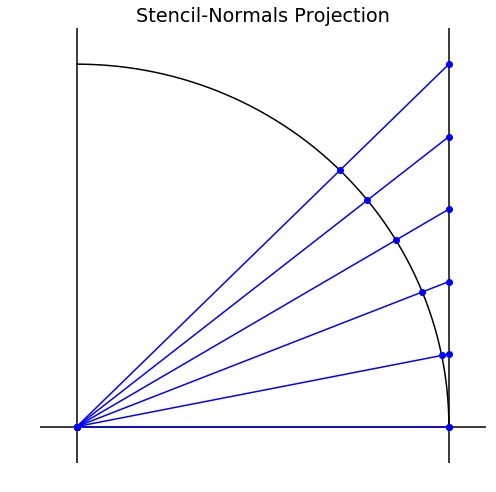

In [34]:
#ts = [np.pi/12, np.pi/6, np.pi/4]
ts = np.arctan([.2*i for i in range(6)])

circ_ts = np.linspace(0, np.pi/2, 500)
plt.figure(figsize=(8,8))
plt.plot(np.cos(circ_ts), np.sin(circ_ts), 'k-')
plt.plot([-10, 10], [0,0], 'k-')
plt.plot([0, 0], [-10, 10], 'k-')
plt.plot([1, 1], [-10, 10], 'k-')
for t in ts:
    plt.plot([0, np.cos(t), 1],[0, np.sin(t), np.tan(t)], 'bo-')

plt.xlim(-.1, 1.1)
plt.ylim(-.1, 1.1)

plt.axis('off')
plt.title('Stencil-Normals Projection')

plt.show()

In [25]:
T = np.zeros((2, 2))
T[:,0] = np.sin(ts[:2])
T[:,1] = np.cos(ts[:2])

a = la.solve(T, np.ones(2))

print(np.dot(a, [np.sin(ts[2]), np.sin(ts[2])]))

0.6424612104873463


In [24]:
a

array([0.28614529, 0.96257484])

In [36]:
from sympy import *
init_printing()

In [121]:
t1, t2, x, a, b, c, d, W = symbols('t1 t2 x a b c d w')
x = Matrix([[cos(t1)-cos(t2), sin(t1)-sin(t2)]]).T
W = Matrix([[a, b],[c,d]])

In [122]:
prod = (x.T*W*x)[0]
display(prod)
print(latex(expand(prod)).replace('t_{1}', '\\theta_2').replace('t_{2}', '\\theta_1'))

a \cos^{2}{\left (\theta_2 \right )} - 2 a \cos{\left (\theta_2 \right )} \cos{\left (\theta_1 \right )} + a \cos^{2}{\left (\theta_1 \right )} + b \sin{\left (\theta_2 \right )} \cos{\left (\theta_2 \right )} - b \sin{\left (\theta_2 \right )} \cos{\left (\theta_1 \right )} - b \sin{\left (\theta_1 \right )} \cos{\left (\theta_2 \right )} + b \sin{\left (\theta_1 \right )} \cos{\left (\theta_1 \right )} + c \sin{\left (\theta_2 \right )} \cos{\left (\theta_2 \right )} - c \sin{\left (\theta_2 \right )} \cos{\left (\theta_1 \right )} - c \sin{\left (\theta_1 \right )} \cos{\left (\theta_2 \right )} + c \sin{\left (\theta_1 \right )} \cos{\left (\theta_1 \right )} + d \sin^{2}{\left (\theta_2 \right )} - 2 d \sin{\left (\theta_2 \right )} \sin{\left (\theta_1 \right )} + d \sin^{2}{\left (\theta_1 \right )}


In [123]:
P = Matrix([[prod.subs(a,1).subs(b,0).subs(c,0).subs(d,0)],
            [prod.subs(a,0).subs(b,1).subs(c,0).subs(d,0)],
            [prod.subs(a,0).subs(b,0).subs(c,0).subs(d,1)]])
display(P)
print(latex(P).replace('t_{1}', '\\theta_2').replace('t_{2}', '\\theta_1'))

⎡                            2          ⎤
⎢         (cos(t₁) - cos(t₂))           ⎥
⎢                                       ⎥
⎢(sin(t₁) - sin(t₂))⋅(cos(t₁) - cos(t₂))⎥
⎢                                       ⎥
⎢                            2          ⎥
⎣         (sin(t₁) - sin(t₂))           ⎦

\left[\begin{matrix}\left(\cos{\left (\theta_2 \right )} - \cos{\left (\theta_1 \right )}\right)^{2}\\\left(\sin{\left (\theta_2 \right )} - \sin{\left (\theta_1 \right )}\right) \left(\cos{\left (\theta_2 \right )} - \cos{\left (\theta_1 \right )}\right)\\\left(\sin{\left (\theta_2 \right )} - \sin{\left (\theta_1 \right )}\right)^{2}\end{matrix}\right]


In [106]:
def my_row(t1, t2):
    x1 = (np.cos(t1)-np.cos(t2))**2
    x2 = (np.sin(t1)-np.sin(t2))*(np.cos(t1)-np.cos(t2)) * 2
    x3 = x2
    x4 = (np.sin(t1)-np.sin(t2))**2
    return np.array([x1, x2, x4])

In [107]:
my_row(*ts[1:3])

array([ 0.00271483, -0.018265  ,  0.03072116])

In [125]:
ts = np.arctan([.2*i for i in range(6)])
n = len(ts)-1
A = np.zeros((n,3))
b = np.tan(ts[1:]) - np.tan(ts[0])
for i in range(1, len(ts)):
    A[i-1] = my_row(ts[i], ts[0])
    
la.lstsq(A, b, rcond=None)

(array([29.29401322, 11.16525102,  6.23629775]),
 array([0.00183405]),
 3,
 array([0.87668294, 0.07277392, 0.00322382]))